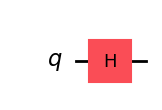

In [8]:
from qiskit.circuit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

# 1つの量子ビットを持つ量子回路を作成
circ = QuantumCircuit(1)

# 量子ビット0にアダマールゲートを適用
circ.h(0)

# 量子回路の描画（matplotlibを使用）
circ.draw('mpl')


In [9]:
from qiskit_ibm_runtime import QiskitRuntimeService

# 認証情報を設定（以前に保存していない場合）
service = QiskitRuntimeService()

# 利用可能なバックエンドを取得
backends = service.backends()
print(backends)


[<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_kyoto')>, <IBMBackend('ibm_osaka')>, <IBMBackend('ibm_sherbrooke')>]


In [12]:
from qiskit_ibm_runtime import QiskitRuntimeService

# 認証情報を設定（以前に保存していない場合）
service = QiskitRuntimeService()

# 利用可能なバックエンドを取得
backends = service.backends()

# 各バックエンドの状態とキューの情報を表示
for backend in backends:
    status = backend.status()
    print(f"バックエンド: {backend.name}")
    print(f"  稼働中: {'Yes' if status.operational else 'No'}")
    print(f"  キューにあるジョブ数: {status.pending_jobs}\n")


バックエンド: ibm_brisbane
  稼働中: Yes
  キューにあるジョブ数: 2825

バックエンド: ibm_kyoto
  稼働中: Yes
  キューにあるジョブ数: 146

バックエンド: ibm_osaka
  稼働中: Yes
  キューにあるジョブ数: 180

バックエンド: ibm_sherbrooke
  稼働中: Yes
  キューにあるジョブ数: 4046



In [13]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.circuit.library import QFT
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler
import numpy as np

# サービスの初期化
service = QiskitRuntimeService()

# 利用するバックエンドの指定
backend_name = 'ibm_kyoto'  # 使用するバックエンド名に修正
backend = service.backend(backend_name)

# 量子回路の作成
pi = np.pi
q = QuantumRegister(5, 'q')
c = ClassicalRegister(5, 'c')
circuit = QuantumCircuit(q, c)
circuit.x(q[4])
circuit.x(q[2])
circuit.x(q[0])

# QFTの追加
qft = QFT(num_qubits=5, approximation_degree=0, do_swaps=True, inverse=False, insert_barriers=False, name='qft')
circuit.append(qft, qargs=q)
circuit.measure(q, c)
circuit.draw(output='mpl', filename='qft1.png')
print(circuit)

# 回路のトランスパイル
transpiled_circuit = transpile(circuit, backend=backend)

# 実行
job = Sampler(backend).run(transpiled_circuit, shots=1000)
print(f"job id: {job.job_id()}")
result = job.result()
print("\n QFT Output")
print("-------------")
print(result.get_counts())

# 逆QFTの追加
circuit = QuantumCircuit(q, c)
circuit.x(q[4])
circuit.x(q[2])
circuit.x(q[0])
circuit.append(QFT(num_qubits=5, approximation_degree=0, do_swaps=True, inverse=False, insert_barriers=True, name='qft'), qargs=q)
circuit.append(QFT(num_qubits=5, approximation_degree=0, do_swaps=True, inverse=True, insert_barriers=True, name='qft'), qargs=q)
circuit.measure(q, c)
circuit.draw(output='mpl', filename='qft2.png')
print(circuit)

# 回路のトランスパイル
transpiled_circuit = transpile(circuit, backend=backend)

# 実行
job = Sampler(backend).run(transpiled_circuit, shots=1000)
print(f"job id: {job.job_id()}")
result = job.result()
print("\n QFT with inverse QFT Output")
print("------------------------------")
print(result.get_counts())


     ┌───┐┌──────┐┌─┐            
q_0: ┤ X ├┤0     ├┤M├────────────
     └───┘│      │└╥┘┌─┐         
q_1: ─────┤1     ├─╫─┤M├─────────
     ┌───┐│      │ ║ └╥┘┌─┐      
q_2: ┤ X ├┤2 qft ├─╫──╫─┤M├──────
     └───┘│      │ ║  ║ └╥┘┌─┐   
q_3: ─────┤3     ├─╫──╫──╫─┤M├───
     ┌───┐│      │ ║  ║  ║ └╥┘┌─┐
q_4: ┤ X ├┤4     ├─╫──╫──╫──╫─┤M├
     └───┘└──────┘ ║  ║  ║  ║ └╥┘
c: 5/══════════════╩══╩══╩══╩══╩═
                   0  1  2  3  4 


/var/folders/pk/hpg1vttd2tx4f_3xjrwpc1yh0000gn/T/ipykernel_5852/2320714601.py:33: DeprecationWarning: The Sampler and Estimator V1 primitives have been deprecated as of qiskit-ibm-runtime 0.23.0 and will be removed no sooner than 3 months after the release date. Please use the V2 Primitives. See the `V2 migration guide <https://docs.quantum.ibm.com/api/migration-guides/v2-primitives>`_. for more details
  job = Sampler(backend).run(transpiled_circuit, shots=1000)


job id: ctttakjseb10008x17x0

 QFT Output
-------------


AttributeError: 'SamplerResult' object has no attribute 'get_counts'

In [14]:
from qiskit import QuantumCircuit, transpile
from qiskit import Aer
import random
import time

ImportError: cannot import name 'Aer' from 'qiskit' (/Users/miyamotomanari/.pyenv/versions/anaconda3-4.3.1/envs/new_qiskit_env/lib/python3.11/site-packages/qiskit/__init__.py)